In [41]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
url = ['https://video.udacity-data.com/topher/2018/April/5ac2907f_fuel-econ/fuel-econ.csv']

In [31]:
file_name = url[0].split('/')[-1]

In [32]:
file_name

'fuel-econ.csv'

In [33]:
if not os.path.exists(file_name):
    resp = requests.get(url[0])
    with open(os.path.join('./',file_name),mode='wb') as file:
        file.write(resp.content)

In [34]:
fuel_econ = pd.read_csv(file_name)
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# 9. Clustered Bar Charts

In [35]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [36]:
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclass = pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classes)
fuel_econ.VClass = fuel_econ.VClass.astype(vclass)
fuel_econ.VClass.unique()

['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars', 'Minicompact Cars']
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

In [37]:
fuel_econ['trans'].value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S7)                    43
Automatic (AV-S6)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [39]:
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x: x.split()[0])
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


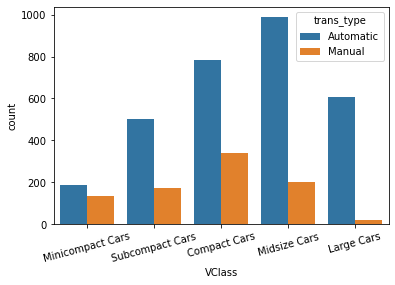

In [43]:
sb.countplot(data=fuel_econ,x='VClass',hue='trans_type');
plt.xticks(rotation=15);

In [50]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')

In [56]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [63]:
ct_counts = ct_counts.pivot(index='VClass',columns='trans_type',values='count')

TypeError: pivot() got an unexpected keyword argument 'fmt'

In [60]:
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


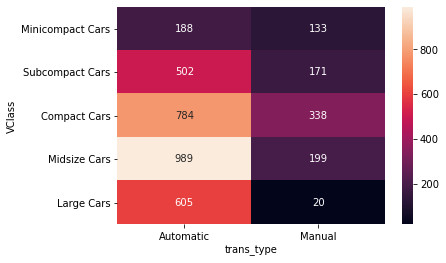

In [64]:
sb.heatmap(ct_counts,annot=True,fmt='d');

# 11. Faceting

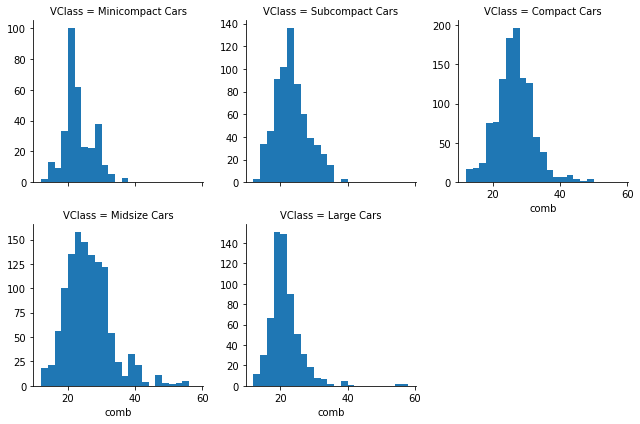

In [81]:
bin_edges = np.arange(12,58+2,2)
g = sb.FacetGrid(data=fuel_econ,col='VClass',col_wrap=3,sharey=False);
g.map(plt.hist,'comb',bins=bin_edges);

In [104]:
group_means = fuel_econ[['trans','comb']].groupby('trans').mean()
group_order = group_means.sort_values(['comb'],ascending=False)

In [89]:
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

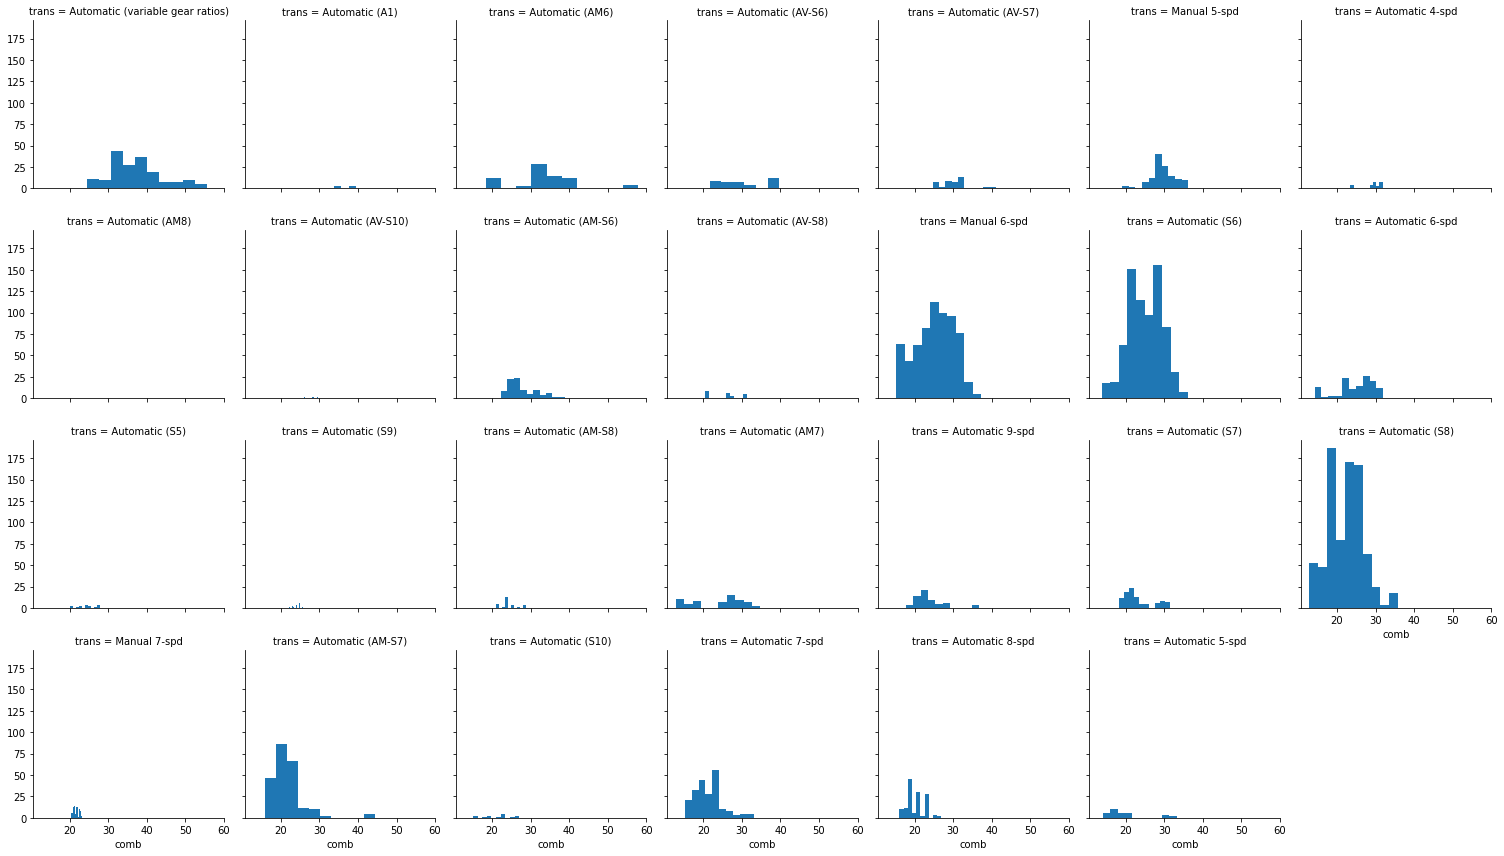

In [90]:
g = sb.FacetGrid(data=fuel_econ,col='trans',col_wrap=7,col_order=group_order);
g.map(plt.hist,'comb');

# 12. Adaptation of Univariate Plots

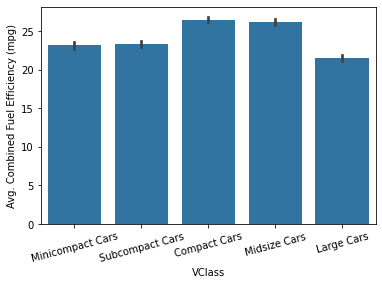

In [91]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

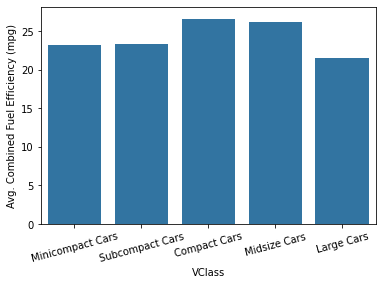

In [92]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color,errwidth=0);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

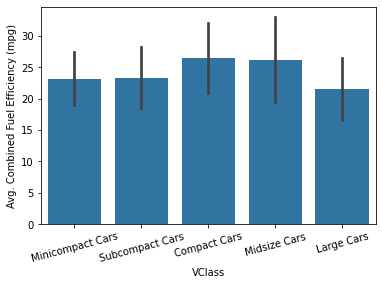

In [93]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color,ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

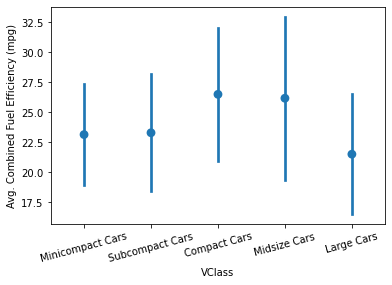

In [94]:
sb.pointplot(data=fuel_econ,x='VClass',y='comb',color=base_color,ci='sd',linestyles='');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

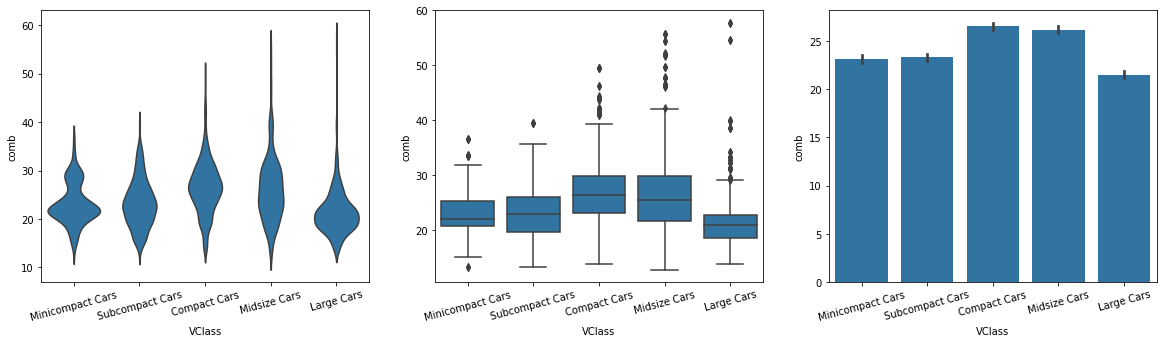

In [95]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sb.violinplot(data=fuel_econ,x='VClass',y='comb',inner=None,color=base_color);
plt.xticks(rotation=15);

plt.subplot(1,3,2)
sb.boxplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=15);

plt.subplot(1,3,3)
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=15);

# 13. Line Plots

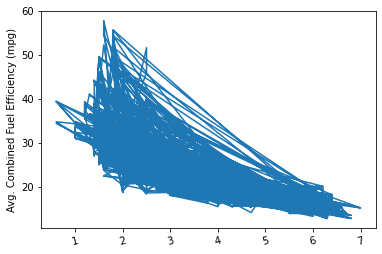

In [96]:
plt.errorbar(data=fuel_econ,x='displ',y='comb');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [99]:
bin_edges = np.arange(0.6,7+0.2,0.2)
bin_centers = bin_edges[:-1]+0.1

displ_binned = pd.cut(x=fuel_econ['displ'],bins=bin_edges,include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

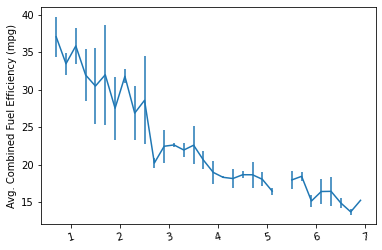

In [100]:
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x=bin_centers,y=comb_mean,yerr=comb_std);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

# 14. Addtional Plot Practice

In [105]:
make_counts = fuel_econ.groupby('make').size()
make_counts_sorted = make_counts.sort_values(ascending=False)

In [106]:
make_counts_sorted = make_counts_sorted.reset_index(name='count')

In [107]:
make_counts_top = make_counts_sorted[make_counts_sorted['count'] > 80]
top_names = make_counts_top.set_index('make').index

In [108]:
top_makes = top_names.tolist()

In [109]:
make_counts_top

,make,count
0,BMW,523
1,Mercedes-Benz,269
2,Porsche,235
3,Ford,218
4,Chevrolet,212
5,Audi,201
6,MINI,201
7,Volkswagen,174
8,Hyundai,158
9,Dodge,140


In [110]:
top_makes

['BMW',
 'Mercedes-Benz',
 'Porsche',
 'Ford',
 'Chevrolet',
 'Audi',
 'MINI',
 'Volkswagen',
 'Hyundai',
 'Dodge',
 'Lexus',
 'Kia',
 'Cadillac',
 'Toyota',
 'Infiniti',
 'Honda',
 'Jaguar',
 'Mazda']

In [111]:
fuel_econ_sub = fuel_econ[fuel_econ['make'].isin(top_makes)]

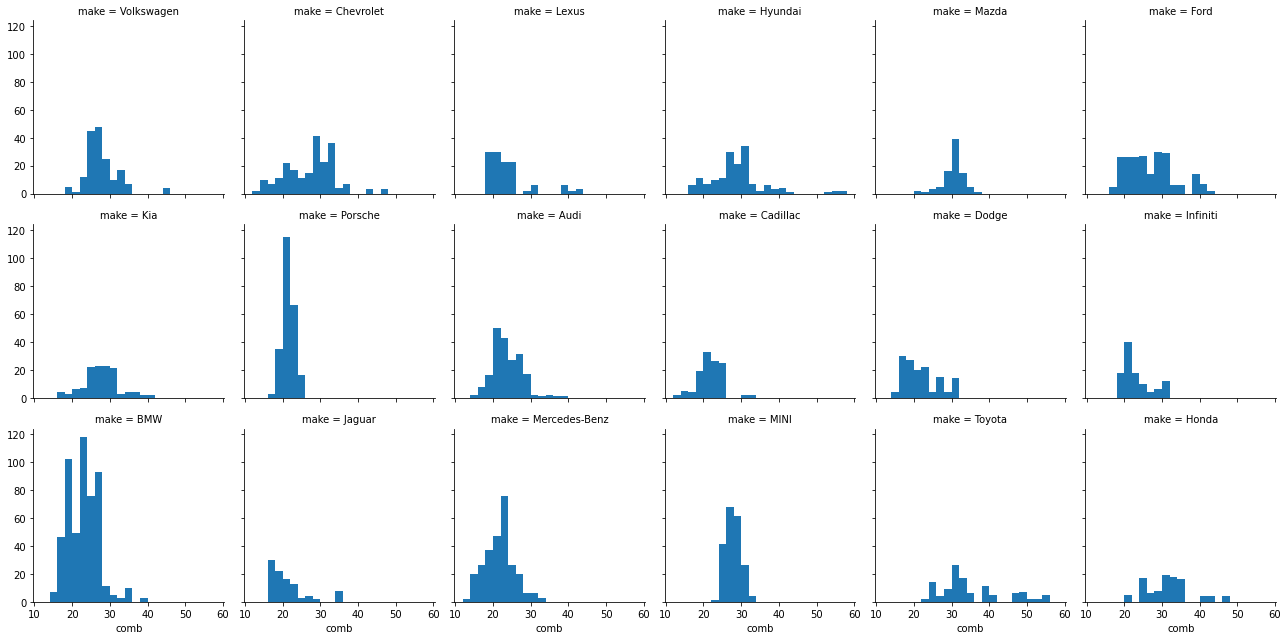

In [112]:
g = sb.FacetGrid(data=fuel_econ_sub,col='make',col_wrap=6)
g.map(plt.hist,'comb',bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2));

In [113]:
base_color = sb.color_palette()[0]
group_means = fuel_econ_sub.groupby(['make']).mean()
group_means

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149
Cadillac,36052.110169,2015.584746,5.474576,3.243220,24.398305,93.983051,18.845043,24.039474,26.939762,38.256114,21.773203,408.686441,4.915254,4.932203
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Dodge,35907.100000,2015.278571,6.285714,4.225714,32.228571,41.035714,18.516134,23.345414,27.948863,39.730484,21.812190,424.164286,4.878571,4.878571
Ford,36168.706422,2015.559633,4.770642,2.560092,19.977064,67.908257,24.015862,31.406761,31.864245,46.266219,26.796018,345.027523,6.261468,6.261468
Honda,36679.217822,2015.762376,4.297030,2.095050,48.108911,79.445545,28.459160,37.321850,36.852788,53.739881,31.588841,285.683168,7.396040,7.435644
Hyundai,35803.639241,2015.417722,4.481013,2.273418,9.765823,76.848101,25.746294,33.590951,33.917482,48.984818,28.793620,323.500000,6.759494,6.759494
Infiniti,36434.888889,2015.703704,5.962963,3.511111,20.861111,72.657407,20.366878,25.880562,27.471818,39.345459,23.002081,396.157407,5.175926,5.175926


In [114]:
group_means = group_means['comb'].sort_values(ascending=False)

In [115]:
group_means

make
Toyota           35.184424
Honda            31.588841
Mazda            30.397474
Hyundai          28.793620
Kia              27.843018
MINI             27.807288
Volkswagen       27.769875
Chevrolet        27.224809
Ford             26.796018
Lexus            23.870986
Audi             23.639240
BMW              23.004798
Infiniti         23.002081
Dodge            21.812190
Cadillac         21.773203
Mercedes-Benz    21.765718
Porsche          21.504786
Jaguar           21.429054
Name: comb, dtype: float64

In [116]:
group_order = group_means.index

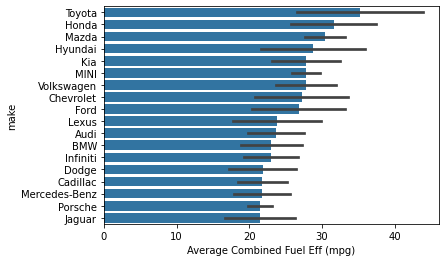

In [117]:
sb.barplot(data=fuel_econ_sub,y='make',x='comb',color=base_color,ci='sd',order=group_order);
plt.xlabel('Average Combined Fuel Eff (mpg)');